In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing=pd.read_csv("Banglorehousedata.csv")

In [3]:
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
housing.shape

(13320, 9)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for i in housing.columns:
    print(housing[i].value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547


In [7]:
# Checking the null values
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
housing=housing.drop(['availability','area_type','society','balcony'], axis=1)
housing.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
housing.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
housing['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
housing['location']=housing['location'].fillna('Sarjapur Road')

In [13]:
housing['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
housing['size']=housing['size'].fillna('2 BHK')

In [15]:
housing['bath']=housing['bath'].fillna(housing['bath'].median())

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [17]:
housing['BHK']=housing['size'].str.split().str.get(0).astype(int)
housing.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
housing[housing.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
housing['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def convertRange(x):
    temp=x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
housing['total_sqft']=housing['total_sqft'].apply(convertRange)

In [22]:
housing.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Price per Square feet

In [23]:
housing['price_per_sqft']=housing['price']*100000 /housing['total_sqft']
housing.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
housing.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [25]:
housing['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [26]:
housing['location']=housing['location'].apply(lambda x:x.strip())
location_count=housing['location'].value_counts()

In [27]:
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [28]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [29]:
housing['location']=housing['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
housing['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [30]:
housing.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [31]:
(housing['total_sqft']/housing['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [32]:
housing=housing[((housing['total_sqft']/housing['BHK'])>=300)]
housing.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [33]:
housing.shape

(12530, 7)

In [34]:
housing.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
# def remove_outliers_sqft(df):
#     df_output=pd.DataFrame()
#     for key,subdf in df.groupby('location'):
#         m = np.mean(subdf.price_per_sqft)
        
#         st = np.std(subdf.price_per_sqft)
        
#         gen_df=subdf[(subdf.price_per_sqft > (m-(2*st))) & (subdf.price_per_sqft <=(m+(2*st)))]       
#         df_ouput=pd.concat([df_output,gen_df],ignore_index=True)
#     return df_ouput
# housing = remove_outliers_sqft(housing)
# housing.describe()

In [36]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        BHK_stats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [37]:
housing=bhk_outlier_remover(housing)

In [38]:
housing.shape

(8694, 7)

In [39]:
housing

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

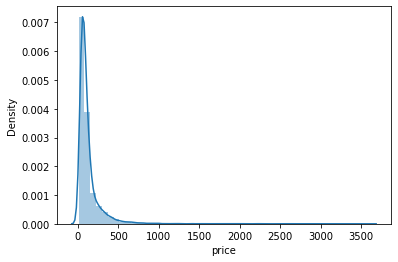

In [40]:
sns.distplot(housing['price'])

In [41]:
housing['price']=np.log(housing['price'])

In [42]:
housing['price'].skew()

0.6968906247786456

In [43]:
housing=housing.drop(['size','price_per_sqft'], axis=1)

In [44]:
housing.describe()

,total_sqft,bath,price,BHK
count,8694.000000,8694.000000,8694.000000,8694.000000
mean,1586.985219,2.567288,4.477126,2.600759
std,988.581900,1.131528,0.778372,1.022424
min,300.000000,1.000000,2.132982,1.000000
25%,1100.000000,2.000000,3.912023,2.000000
50%,1285.500000,2.000000,4.369448,2.000000
75%,1750.000000,3.000000,4.888462,3.000000
max,26136.000000,16.000000,8.188689,16.000000


# Cleaned Data

In [45]:
housing.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,3.665355,2
2,Uttarahalli,1440.0,2.0,4.127134,3
3,Lingadheeranahalli,1521.0,3.0,4.553877,3
4,Kothanur,1200.0,2.0,3.931826,2
6,Old Airport Road,2732.0,4.0,5.318120,4


In [46]:
housing.to_csv('Cleaned_data.csv')

In [47]:
X=housing.drop(['price'],axis=1)
Y=housing['price']
X.head()

,location,total_sqft,bath,BHK
0,Electronic City Phase II,1056.0,2.0,2
2,Uttarahalli,1440.0,2.0,3
3,Lingadheeranahalli,1521.0,3.0,3
4,Kothanur,1200.0,2.0,2
6,Old Airport Road,2732.0,4.0,4


In [48]:
Y

0        3.665355
2        4.127134
3        4.553877
4        3.931826
6        5.318120
           ...   
13314    4.718499
13316    5.991465
13317    4.094345
13318    6.190315
13319    2.833213
Name: price, Length: 8694, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
print(X_train.shape)
print(X_test.shape)

(6955, 4)
(1739, 4)


In [51]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),
                                     remainder='passthrough')

In [52]:
scaler=StandardScaler()

In [53]:
lr=LinearRegression()

In [54]:
pipe=make_pipeline(column_trans,scaler,lr)

In [55]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [56]:
y_pred_lr=pipe.predict(X_test)

In [57]:
r2_score(y_test,y_pred_lr)

0.7835904845877358

In [58]:

# model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()

# Applying the Decision tree regressor

In [59]:
dt=DecisionTreeRegressor()

In [60]:
pipe=make_pipeline(column_trans,scaler,dt)

In [61]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [62]:
y_pred_dt=pipe.predict(X_test)

In [63]:
r2_score(y_test,y_pred_dt)

0.7870702250625699

# Applying the Random Forest Regressor

In [64]:
model = RandomForestRegressor()

In [65]:
pipe=make_pipeline(column_trans,scaler,model)

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [67]:
y_pred=pipe.predict(X_test)

In [68]:
r2_score(y_test,y_pred)

0.8418274221888666

In [69]:
print('Regression :' ,r2_score(y_test,y_pred_lr))
print('Decesion Tree :', r2_score(y_test,y_pred_dt))
print('Random Forest :', r2_score(y_test,y_pred))

Regression : 0.7835904845877358
Decesion Tree : 0.7870702250625699
Random Forest : 0.8418274221888666


# Evaluating the model

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
rmse

0.3068352955582196

# Saving the model

In [72]:
from joblib import dump,load
dump(pipe,'housepred.joblib')

['housepred.joblib']

In [73]:
# Dummies values
# housing =pd.get_dummies(housing , columns=['location'])
# housing

In [74]:
# Label Encoding methods
# series=housing[['size']]
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# series=series[series.columns[:]].apply(le.fit_transform)
# series